In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
data=pd.read_csv("/content/sample_data/Boston.csv")
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
is_null = data.isnull()
print(is_null)

     Unnamed: 0   crim     zn  indus   chas    nox     rm    age    dis  \
0         False  False  False  False  False  False  False  False  False   
1         False  False  False  False  False  False  False  False  False   
2         False  False  False  False  False  False  False  False  False   
3         False  False  False  False  False  False  False  False  False   
4         False  False  False  False  False  False  False  False  False   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
501       False  False  False  False  False  False  False  False  False   
502       False  False  False  False  False  False  False  False  False   
503       False  False  False  False  False  False  False  False  False   
504       False  False  False  False  False  False  False  False  False   
505       False  False  False  False  False  False  False  False  False   

       rad    tax  ptratio  black  lstat   medv  
0    False  False    False  False  False  False  

In [4]:
data.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [5]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(15, 15)

<Axes: >

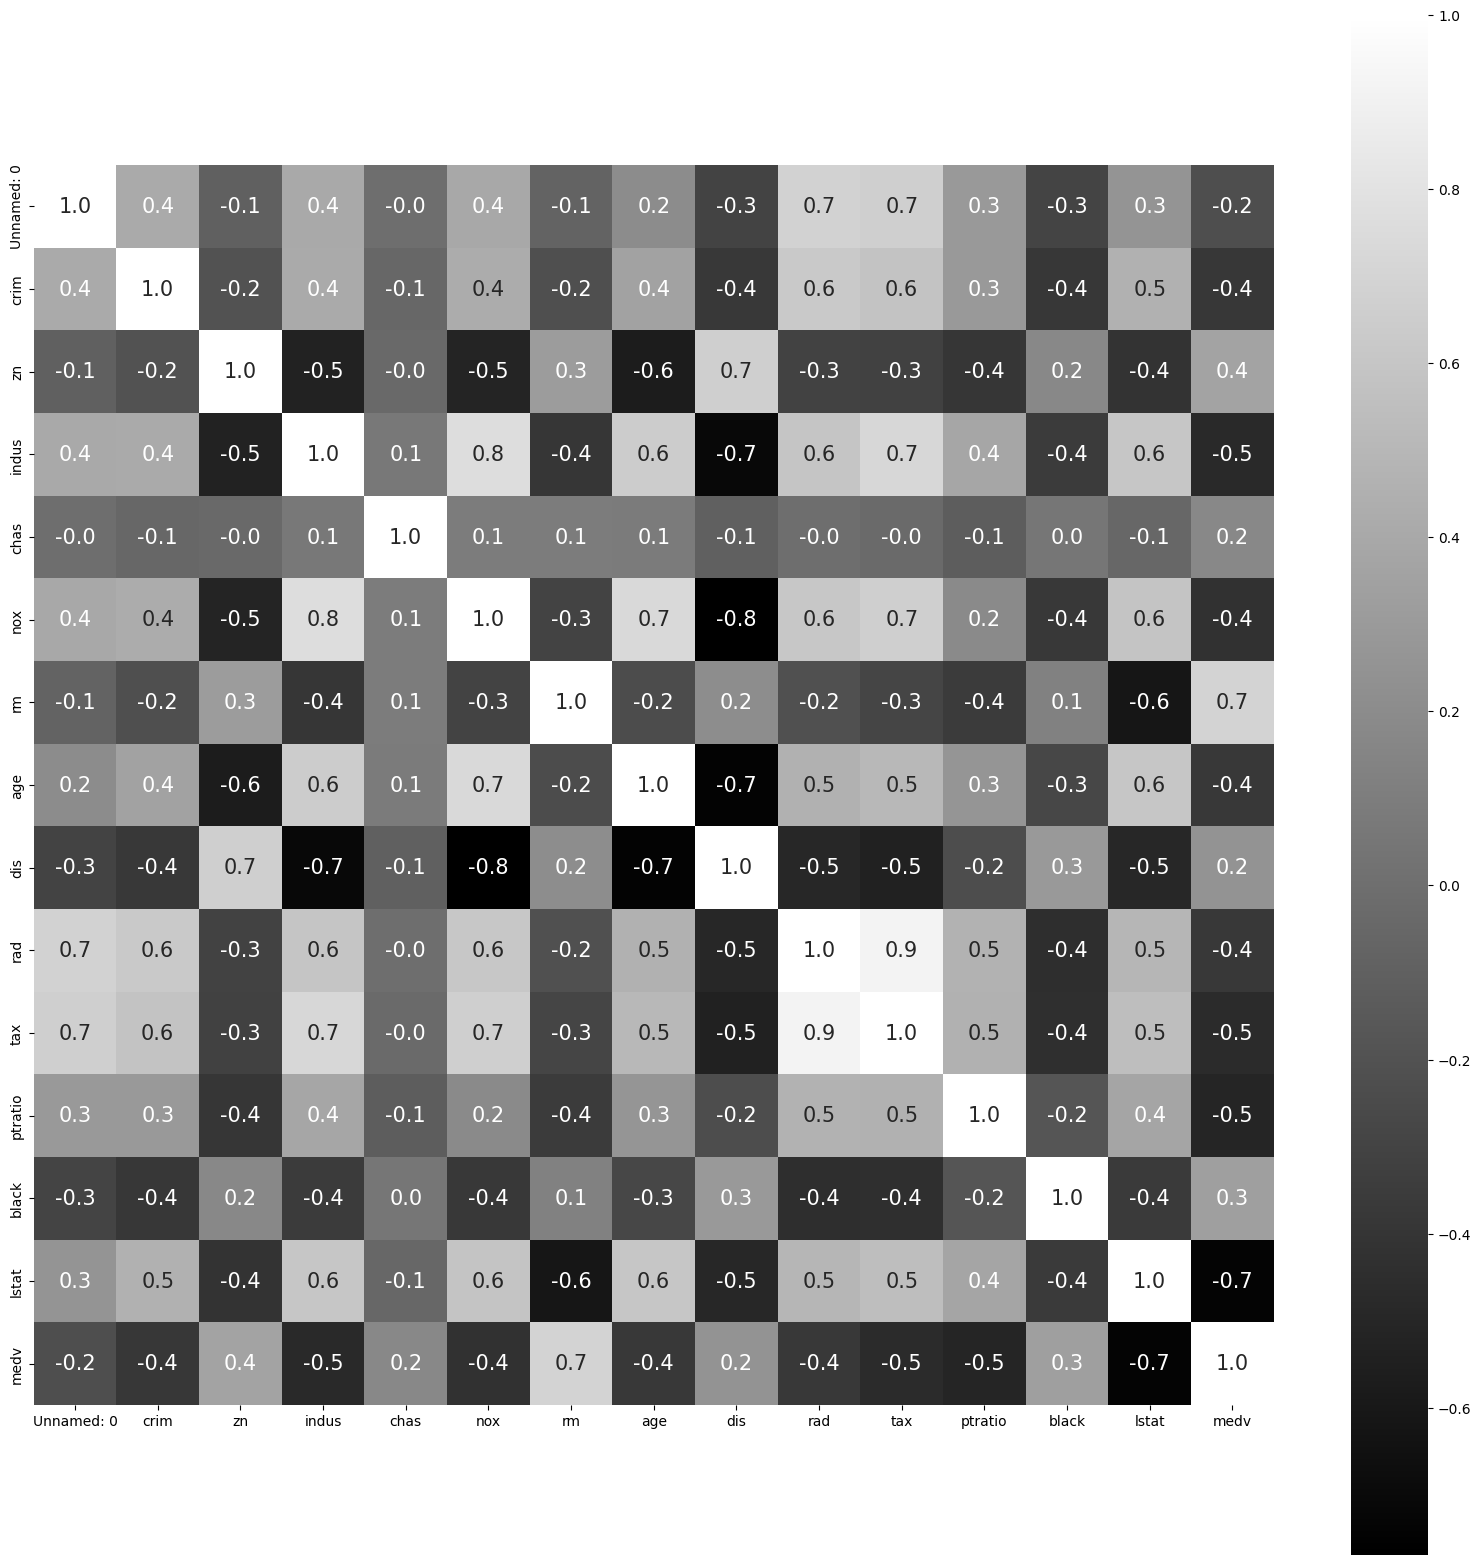

In [6]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [7]:
X =data.drop(['medv'], axis = 1)# data['area']#
y = data['medv']

In [8]:
X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
X.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [10]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [11]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [12]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [23]:
model = Sequential()
model.add(Dense(64, input_dim =14, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [25]:
X_train.shape

(354, 14)

In [26]:
X_train

array([[1.66666667e-01, 4.97584126e-04, 0.00000000e+00, ...,
        6.27659574e-01, 1.00000000e+00, 2.23829787e-01],
       [7.02380952e-01, 4.12386754e-04, 8.00000000e-01, ...,
        1.00000000e+00, 9.64446013e-01, 1.79290780e-01],
       [4.38492063e-01, 4.51152682e-03, 0.00000000e+00, ...,
        5.10638298e-01, 9.95814212e-01, 5.59716312e-01],
       ...,
       [8.71031746e-01, 1.05477382e-01, 0.00000000e+00, ...,
        8.08510638e-01, 1.00000000e+00, 6.00000000e-01],
       [3.45238095e-01, 8.78387158e-04, 0.00000000e+00, ...,
        4.25531915e-01, 9.90745877e-01, 2.24397163e-01],
       [2.42063492e-01, 9.74149903e-04, 0.00000000e+00, ...,
        6.91489362e-01, 9.52569469e-01, 4.59574468e-01]])

In [30]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 32ms/step - loss: 25.4521 - mse: 25.4521 - mae: 3.9256 - val_loss: 25.0082 - val_mse: 25.0082 - val_mae: 3.0062
Epoch 2/200
9/9 [==============================] - 0s 17ms/step - loss: 24.9979 - mse: 24.9979 - mae: 3.6613 - val_loss: 26.5677 - val_mse: 26.5677 - val_mae: 2.9826
Epoch 3/200
9/9 [==============================] - 0s 19ms/step - loss: 21.1723 - mse: 21.1723 - mae: 3.4449 - val_loss: 24.2338 - val_mse: 24.2338 - val_mae: 2.9755
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 23.0002 - mse: 23.0002 - mae: 3.5600 - val_loss: 28.5076 - val_mse: 28.5076 - val_mae: 3.1101
Epoch 5/200
9/9 [==============================] - 0s 12ms/step - loss: 22.1586 - mse: 22.1586 - mae: 3.4292 - val_loss: 24.6022 - val_mse: 24.6022 - val_mae: 2.8914
Epoch 6/200
9/9 [==============================] - 0s 12ms/step - loss: 22.9618 - mse: 22.9618 - mae: 3.4621 - val_loss: 25.4775 - val_mse: 25.4775 - val_mae: 2.9108
Epoc

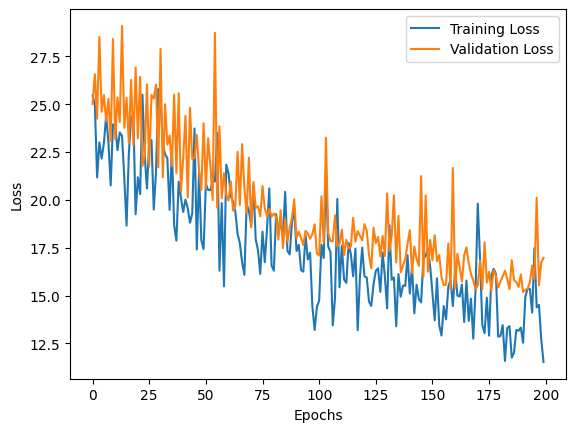

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


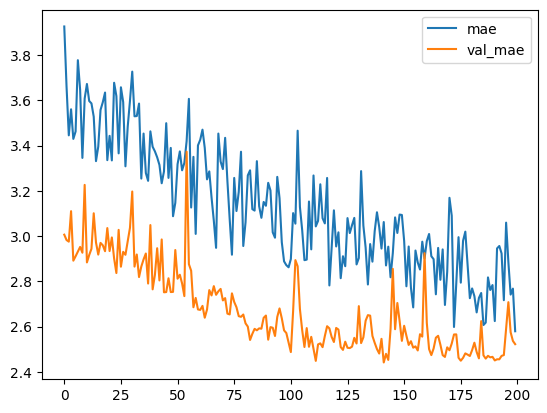

In [31]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [33]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  23.526193618774414
Mean Absolute Error :  3.0365941524505615


In [34]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 2ms/step


array([[15.331106],
       [23.242916],
       [18.57003 ],
       [17.533838],
       [40.77118 ],
       [23.746233],
       [30.678253],
       [18.464754],
       [14.321096],
       [18.36558 ],
       [24.56506 ],
       [23.876143],
       [19.543194],
       [32.75017 ],
       [19.765955],
       [11.968174],
       [19.78599 ],
       [11.00399 ],
       [10.160557],
       [14.785352],
       [ 7.683207],
       [16.194244],
       [17.694653],
       [18.847141],
       [18.037273],
       [17.740131],
       [17.6336  ],
       [15.476388],
       [21.861782],
       [15.724732],
       [11.681655],
       [21.337168],
       [30.047895],
       [19.098928],
       [16.327929],
       [14.407829],
       [29.278814],
       [41.225117],
       [21.760324],
       [23.041132],
       [34.79458 ],
       [29.343687],
       [15.000987],
       [28.596273],
       [29.044338],
       [21.787603],
       [40.799202],
       [17.715672],
       [18.094389],
       [21.37942 ],


In [35]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.774696621281526


5/5 [==============================] - 0s 2ms/step


[]

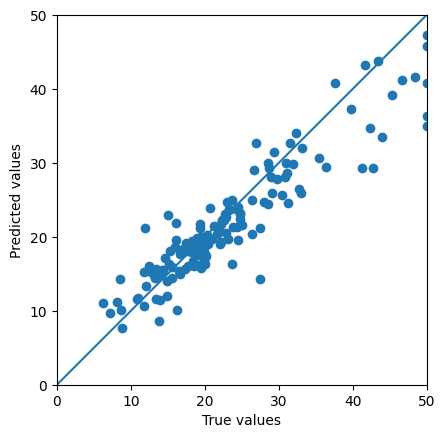

In [36]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

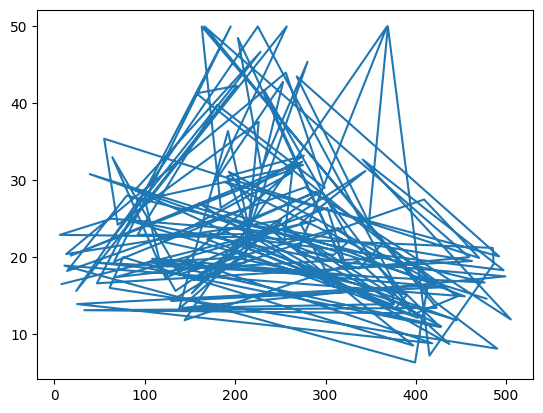

In [37]:
plt.plot(y_test)


array([[15.331106],
       [23.242916],
       [18.57003 ],
       [17.533838],
       [40.77118 ],
       [23.746233],
       [30.678253],
       [18.464754],
       [14.321096],
       [18.36558 ],
       [24.56506 ],
       [23.876143],
       [19.543194],
       [32.75017 ],
       [19.765955],
       [11.968174],
       [19.78599 ],
       [11.00399 ],
       [10.160557],
       [14.785352],
       [ 7.683207],
       [16.194244],
       [17.694653],
       [18.847141],
       [18.037273],
       [17.740131],
       [17.6336  ],
       [15.476388],
       [21.861782],
       [15.724732],
       [11.681655],
       [21.337168],
       [30.047895],
       [19.098928],
       [16.327929],
       [14.407829],
       [29.278814],
       [41.225117],
       [21.760324],
       [23.041132],
       [34.79458 ],
       [29.343687],
       [15.000987],
       [28.596273],
       [29.044338],
       [21.787603],
       [40.799202],
       [17.715672],
       [18.094389],
       [21.37942 ],


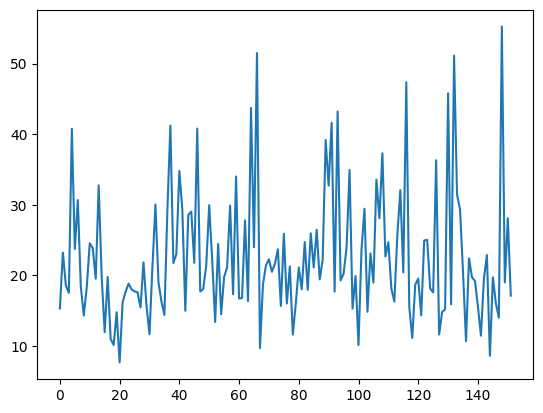

In [38]:
plt.plot(Y_pred)
Y_pred

In [39]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[15.331106]
 [23.242916]
 [18.57003 ]
 [17.533838]
 [40.77118 ]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: medv, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: medv, dtype: float64

Using ML MODEL lm for Linear Regression

In [40]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [41]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
# Value of y intercept
lm.intercept_

27.637914578957258

In [43]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Unnamed: 0,-1.120593
1,crim,-10.979335
2,zn,5.750192
3,indus,-0.234247
4,chas,4.683688
5,nox,-6.865758
6,rm,16.063256
7,age,-0.569172
8,dis,-17.198256
9,rad,7.919327


In [44]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.747284910148261
Adjusted R^2: 0.7368482987679532
MAE: 3.0799724688246988
MSE: 19.022074481402164
RMSE: 4.36143032518028


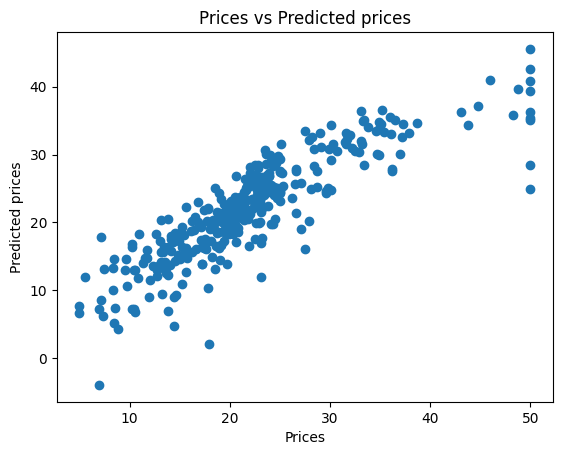

In [46]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

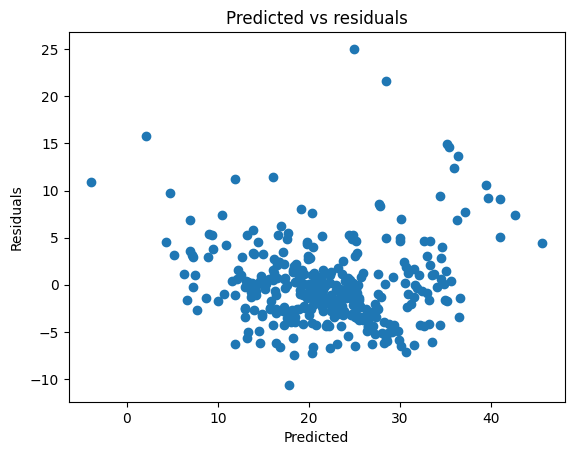

In [47]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-48-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


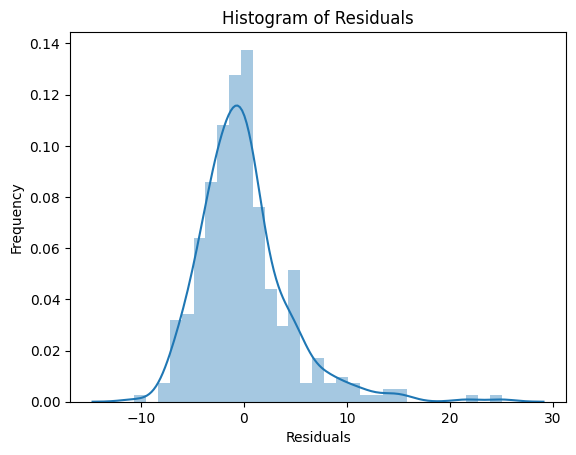

In [48]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [50]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7134033837044162
Adjusted R^2: 0.6841161382435537
MAE: 3.8549920587264106
MSE: 29.926439389320194
RMSE: 5.470506319283453
